## write out 10 bands 

In [1]:
#https://automating-gis-processes.github.io/CSC18/lessons/L6/raster-mosaic.html
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
import pandas as pd

reproject and change res if needed

In [2]:
!rio warp G:\\Belize\\Precip\\_features\\extracted_features.tiff \
    G:\\Belize\\Precip\\_features\\extracted_features_projected.tif --dst-crs EPSG:4326 --res 0.00022


Get file names


In [3]:
# File and folder paths
#dirpath = r"../Data/GEE/"
dirpath = r"G:\Belize\Precip\_features"
  
# Make a search criteria to select the DEM files
#search_criteria = "MDS_mos*.tif"
search_criteria = "extra*projected.tif"

q = os.path.join(dirpath, search_criteria)

print(q)


GEE = glob.glob(q)
GEE

G:\Belize\Precip\_features\extra*projected.tif


['G:\\Belize\\Precip\\_features\\extracted_features_projected.tif']

Empty list for the datafiles that will be part of the mosaic. 

open all those files in read mode with raterio and add those files into a our source file list

In [4]:
src_files_to_mosaic = []

for fp in GEE:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)
 

In [5]:
src_files_to_mosaic[0].indexes

(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23)

In [6]:
# Copy the metadata
out_meta = src.meta.copy()

out_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 8182,
 'height': 12046,
 'count': 23,
 'crs': CRS({'init': 'epsg:4326'}),
 'transform': Affine(0.00022, 0.0, -89.24999864771962,
        0.0, -0.00022, 18.499999530613422)}

create clean output names

In [7]:
feature_names = pd.read_csv(os.path.join(dirpath,'features_names.csv'))
feature_names.head()

def clean_name(band_num):
    name = feature_names[feature_names.band==band_num].feature_name.tolist()[0]
    return name.replace('"', '')

Merge those together band by band and create a mosaic with rasterio’s merge function.

In [8]:
# iterate through bands and write to file 
for band in list(src_files_to_mosaic[0].indexes):
    print('working on band'+str(band))
    
    # mosaic tiles 
    mosaic, out_trans = merge(src_files_to_mosaic,indexes=band)
    
    # Update the metadata
    out_meta.update({"driver": "GTiff",
                  "height": mosaic.shape[1],
                  "width": mosaic.shape[2],
                  'count': 1,
                  "transform": out_trans 
                  }  )
    
    # set destination
    out_fp = os.path.join(dirpath, clean_name(band_num=band)+".tif")
    
    # write 
    with rasterio.open(out_fp, "w", **out_meta) as dest:
         dest.write(mosaic)

working on band1
working on band2
working on band3
working on band4
working on band5
working on band6
working on band7
working on band8
working on band9
working on band10
working on band11
working on band12
working on band13
working on band14
working on band15
working on band16
working on band17
working on band18
working on band19
working on band20
working on band21
working on band22
working on band23


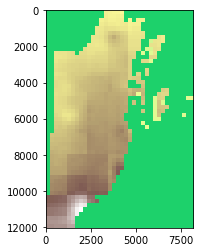

In [9]:
%matplotlib inline
show(mosaic, cmap='terrain')